# Network Comparison

## Install statements

In [3]:
# Install statements

# install.packages("bnlearn")
# install.packages("dagitty")

In [4]:
# install.packages("BiocManager")
# BiocManager::install("Rgraphviz")

In [2]:
# Packages

library( bnlearn )
library( dagitty )

## The networks


  Random/Generated Bayesian network

  model:
   [Age][Caffeine][Cannabis][Escore][Gender][Meth][Ascore|Gender][Cscore|Gender]
   [Education|Age][Nscore|Gender][Oscore|Gender][Impulsive|Ascore:Cscore]
   [Sensation_seeking|Ascore:Escore:Gender:Impulsive:Oscore]
  nodes:                                 13 
  arcs:                                  12 
    undirected arcs:                     0 
    directed arcs:                       12 
  average markov blanket size:           3,08 
  average neighbourhood size:            1,85 
  average branching factor:              0,92 

  generation algorithm:                  Empty 


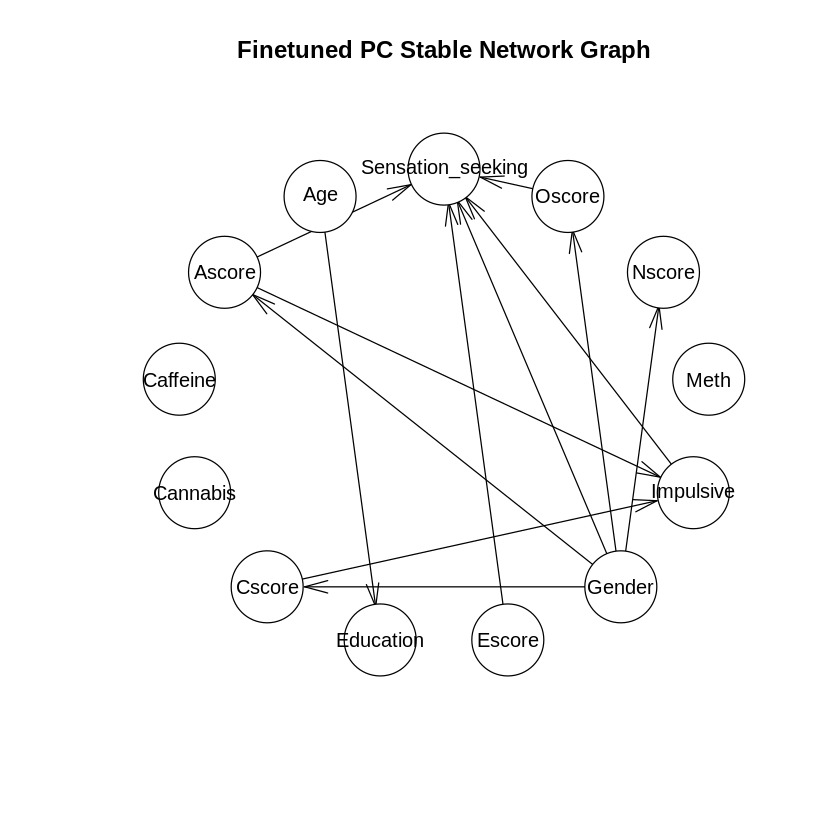


  Random/Generated Bayesian network

  model:
   [Age][Caffeine][Escore][Gender][Ascore|Gender][Cannabis|Age][Cscore|Gender]
   [Education|Age][Nscore|Gender][Oscore|Age]
   [Impulsive|Ascore:Cscore:Escore:Gender:Nscore:Oscore][Meth|Cannabis]
   [Sensation_seeking|Ascore:Escore:Gender:Impulsive:Oscore]
  nodes:                                 13 
  arcs:                                  18 
    undirected arcs:                     0 
    directed arcs:                       18 
  average markov blanket size:           4,62 
  average neighbourhood size:            2,77 
  average branching factor:              1,38 

  generation algorithm:                  Empty 


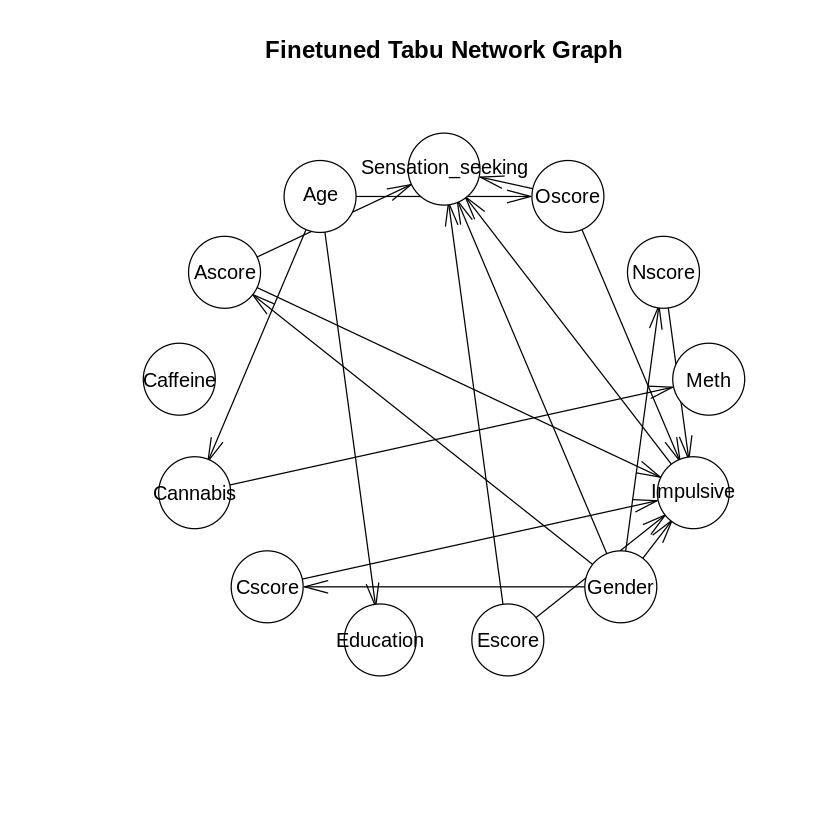

In [3]:
# Tabu
tabu_network = model2network("[Age][Gender][Escore][Caffeine][Education|Age][Nscore|Gender][Oscore|Age][Ascore|Gender][Cscore|Gender][Cannabis|Age][Impulsive|Gender:Nscore:Escore:Oscore:Ascore:Cscore][Meth|Cannabis][Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]")

# PC Stable
pcstable_network = model2network("[Age][Gender][Escore][Caffeine][Cannabis][Meth][Education|Age][Nscore|Gender][Oscore|Gender][Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore][Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]")

# Plot both networks
plot(pcstable_network, main="Finetuned PC Stable Network Graph")
pcstable_network

plot(tabu_network, main="Finetuned Tabu Network Graph")
tabu_network

## Comparison of structure learning results

In [4]:
# Compute similarities and dissimilarities between both networks

all.equal(tabu_network, pcstable_network)

[1] "Different number of directed/undirected arcs"

In [5]:
hamming(tabu_network, pcstable_network)

[1] 8

The compared network structures compared on BIC level with eachother:

| Network   | BIC          |
|-----------|--------------|
| PC Stable | -51054.93731 |
| Tabu      | -50711,03519 |

Loading required namespace: Rgraphviz


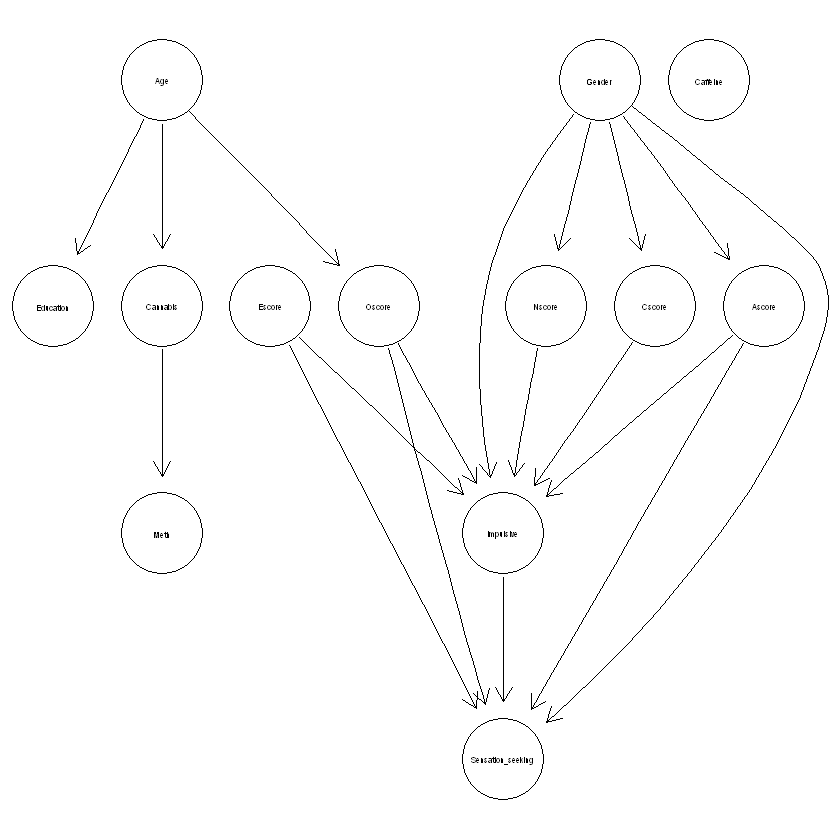

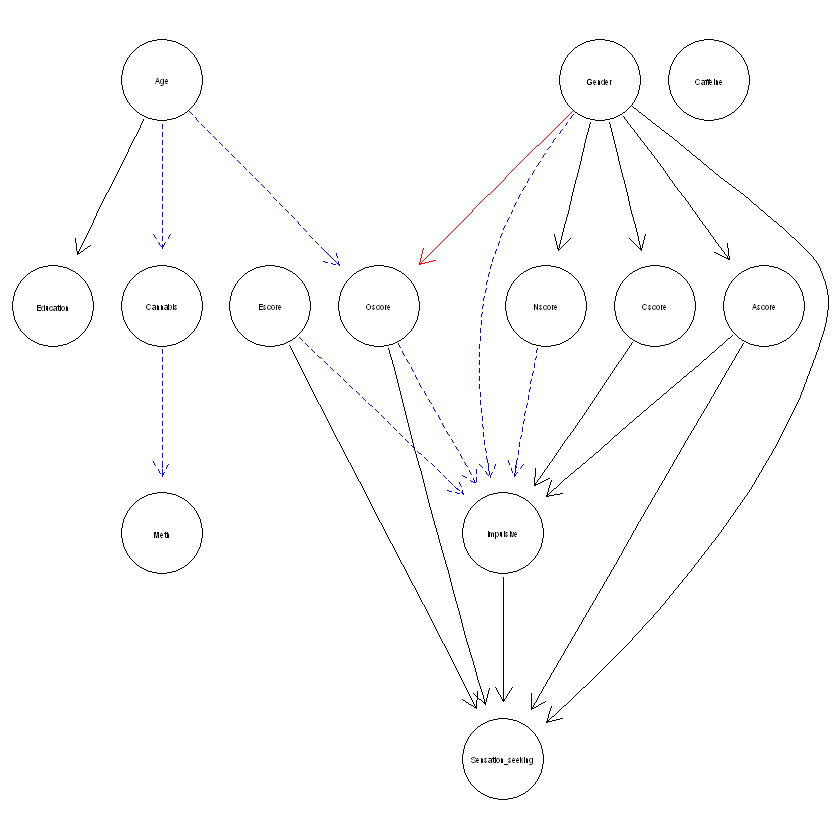

In [7]:
graphviz.compare(tabu_network, pcstable_network)

## Comparison with assignment 1

In [27]:
assignment_1_dag <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.070,0.753"]
Ascore [pos="0.270,0.753"]
Caffeine [pos="0.839,0.112"]
Cannabis [pos="0.846,0.427"]
Cscore [pos="0.270,0.260"]
Education [pos="0.650,0.426"]
Escore [pos="0.270,0.508"]
Gender [pos="0.074,0.260"]
Impulsive [pos="0.474,0.958"]
Meth [pos="0.846,0.834"]
Nscore [pos="0.264,0.900"]
Oscore [pos="0.270,0.088"]
Sensation_seeking [pos="0.447,0.072"]
Age -> Ascore [pos="0.188,0.797"]
Age -> Caffeine [pos="0.010,0.025"]
Age -> Cannabis [pos="0.311,0.741"]
Age -> Cscore [pos="0.039,0.480"]
Age -> Education [pos="0.458,0.713"]
Age -> Escore
Age -> Impulsive [pos="0.196,0.999"]
Age -> Meth [pos="0.302,0.847"]
Age -> Nscore
Age -> Oscore [pos="0.036,0.406"]
Age -> Sensation_seeking [pos="0.024,0.257"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.350,0.851"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Impulsive [pos="0.420,0.769"]
Cscore -> Meth [pos="0.577,0.720"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine [pos="0.393,0.237"]
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive [pos="0.404,0.691"]
Escore -> Meth [pos="0.158,0.875"]
Gender -> Ascore [pos="0.077,0.567"]
Gender -> Cscore
Gender -> Escore [pos="0.199,0.421"]
Gender -> Nscore [pos="0.077,0.534"]
Gender -> Oscore [pos="0.137,0.151"]
Impulsive -> Cannabis
Impulsive -> Meth [pos="0.603,0.879"]
Impulsive -> Sensation_seeking [pos="0.609,0.085"]
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education [pos="0.364,0.319"]
Oscore -> Impulsive [pos="0.305,0.395"]
Oscore -> Meth [pos="0.480,0.679"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.329,0.574"]
}
')

### Compute Hamming distance between both networks and the manually constructed network

In [28]:
human_network <- toString(assignment_1_dag,"bnlearn")
human_network <- model2network(human_network)

In [29]:
hamming(human_network, pcstable_network)
hamming(human_network, tabu_network)

[1] 37

[1] 34

### Visual comparison of of both networks with manually constructed network

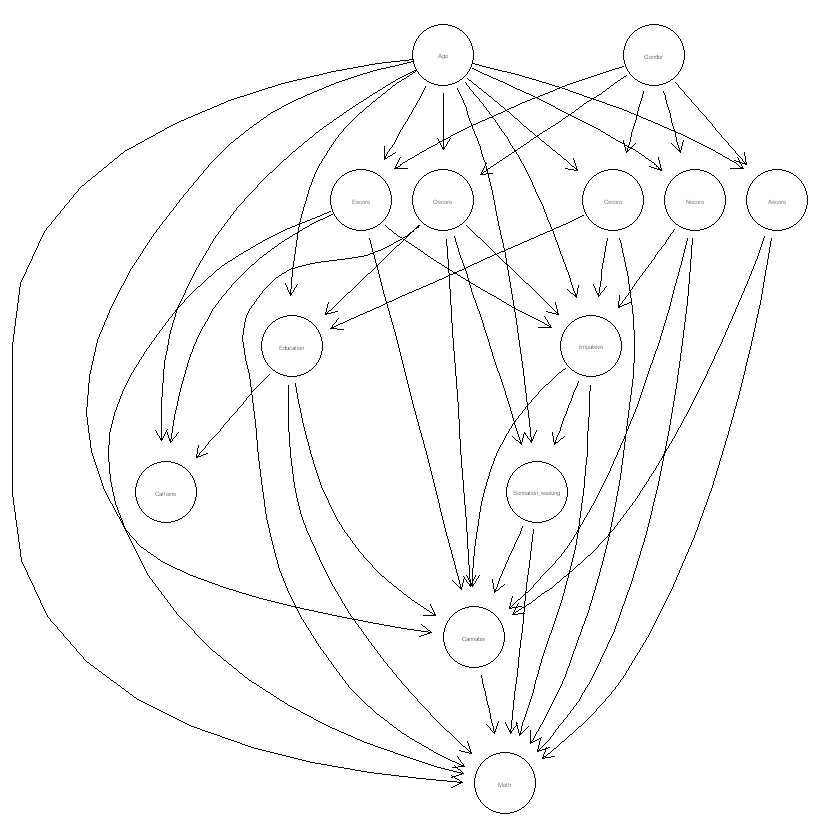

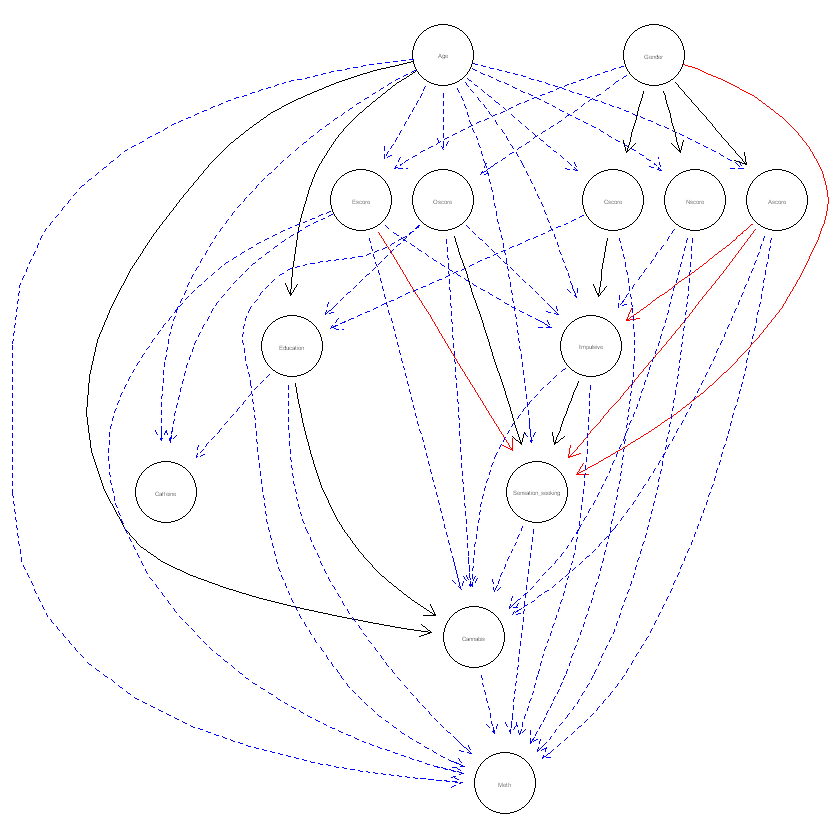

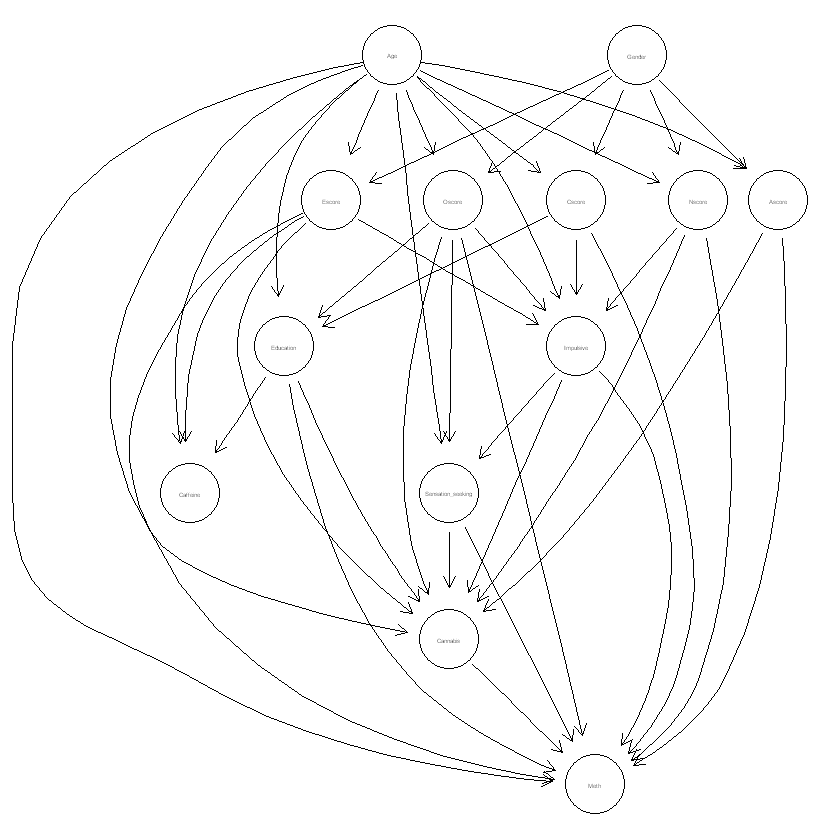

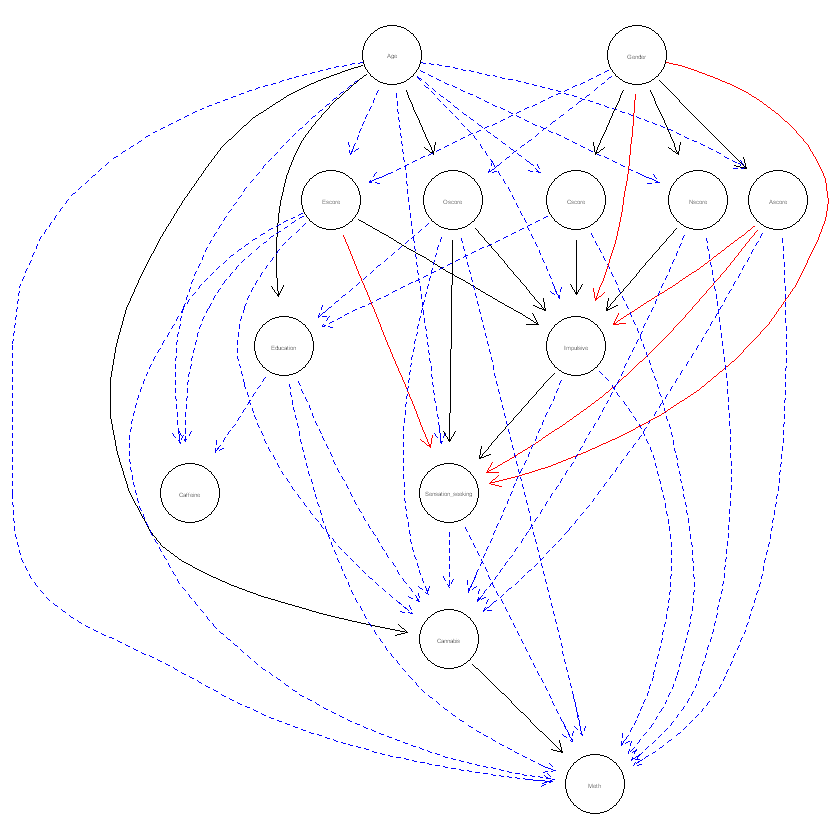

In [30]:
graphviz.compare(human_network, pcstable_network)
graphviz.compare(human_network, tabu_network)